In [1]:
import tensorflow as tf 

In [2]:
# Initialising the CNN
classifier = tf.keras.models.Sequential()

classifier.add(tf.keras.layers.Convolution2D(filters=32, kernel_size=3, padding="same", input_shape=(64, 64, 3),
                                             activation='relu'))

classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Convolution2D(filters=64, kernel_size=3, padding="same", activation="relu"))
classifier.add(tf.keras.layers.MaxPooling2D(pool_size=2, strides=2, padding='valid'))

classifier.add(tf.keras.layers.Flatten())

classifier.add(tf.keras.layers.Dense(units=128, activation='relu'))
classifier.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 16384)             0         
_________________________________________________________________
dense (Dense)                (None, 128)               2097280   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 1

In [31]:
# Part 2 - Fitting the CNN to the images

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1. / 255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

training_set = train_datagen.flow_from_directory(r'C:\Users\Anas\Desktop\minorproject\train',
                                                 target_size=(64, 64),
                                                 batch_size=32,
                                                 class_mode='binary')

test_set = test_datagen.flow_from_directory(r'C:\Users\Anas\Desktop\minorproject\test',
                                            target_size=(64, 64),
                                            batch_size=32,
                                            class_mode='binary')

Found 1400 images belonging to 2 classes.
Found 600 images belonging to 2 classes.


In [49]:
#training 
history = classifier.fit(training_set,
                         steps_per_epoch=4,
                         epochs=10,
                         validation_data=test_set,
                         validation_steps=4)

Epoch 1/10
4/4 [==============================] - 2s 573ms/step - loss: 0.1002 - accuracy: 0.9688 - val_loss: 0.4796 - val_accuracy: 0.9219
Epoch 2/10
4/4 [==============================] - 2s 496ms/step - loss: 0.0174 - accuracy: 1.0000 - val_loss: 0.3925 - val_accuracy: 0.8828
Epoch 3/10
4/4 [==============================] - 2s 560ms/step - loss: 0.0656 - accuracy: 0.9844 - val_loss: 0.6290 - val_accuracy: 0.8672
Epoch 4/10
4/4 [==============================] - 2s 544ms/step - loss: 0.0112 - accuracy: 1.0000 - val_loss: 0.4142 - val_accuracy: 0.9375
Epoch 5/10
4/4 [==============================] - 2s 571ms/step - loss: 0.1013 - accuracy: 0.9609 - val_loss: 0.7120 - val_accuracy: 0.8828
Epoch 6/10
4/4 [==============================] - 2s 541ms/step - loss: 0.0163 - accuracy: 0.9922 - val_loss: 0.8569 - val_accuracy: 0.8672
Epoch 7/10
4/4 [==============================] - 2s 523ms/step - loss: 0.0514 - accuracy: 0.9844 - val_loss: 0.4417 - val_accuracy: 0.8906
Epoch 8/10
4/4 [====

In [50]:
classifier.save(r'C:\Users\Anas\Desktop\minorproject\my_covModel.h5')

In [51]:
# evaluation on test set
loaded_model = tf.keras.models.load_model(r'C:\Users\Anas\Desktop\minorproject\my_covModel.h5')
loaded_model.evaluate(test_set)

19/19 [==============================] - 3s 137ms/step - loss: 0.6200 - accuracy: 0.8867


[0.6200150847434998, 0.8866666555404663]

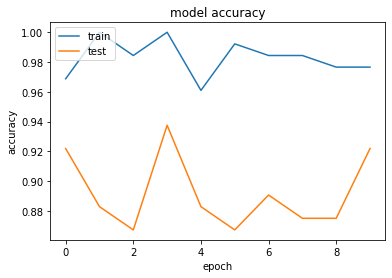

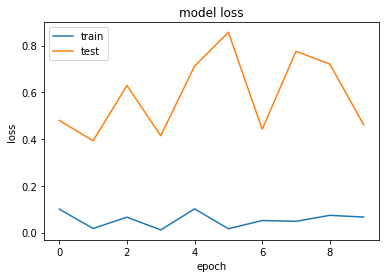

In [52]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Normal


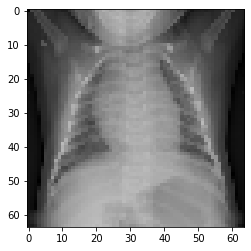

In [53]:
# for only one prediction
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = image.load_img(r'C:\Users\Anas\Desktop\minorproject\normal\Normal-1390.png',target_size=(64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'Normal'
else:
    prediction = 'Covid'
print(prediction)

In [54]:
# plot confusion metrix
y_pred = []
y_test = []
import os

for i in os.listdir(r"C:\Users\Anas\Desktop\minorproject\test\normal"):
    img = image.load_img(r"C:\Users\Anas\Desktop\minorproject\test\normal/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(1)

for i in os.listdir(r"C:\Users\Anas\Desktop\minorproject\test\Covid"):
    img = image.load_img(r"C:\Users\Anas\Desktop\minorproject\test\Covid/" + i, target_size=(64, 64))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    p = classifier.predict_classes(img)
    y_test.append(p[0, 0])
    y_pred.append(0)

y_pred = np.array(y_pred)
y_test = np.array(y_test)

c:\users\anas\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\engine\sequential.py:455: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


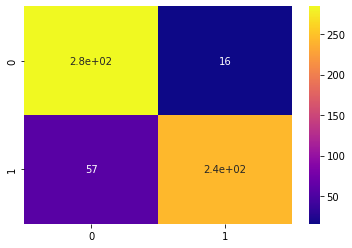

              precision    recall  f1-score   support

           0       0.83      0.95      0.89       300
           1       0.94      0.81      0.87       300

    accuracy                           0.88       600
   macro avg       0.89      0.88      0.88       600
weighted avg       0.89      0.88      0.88       600



In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import classification_report

cm = confusion_matrix(y_pred, y_test)
sns.heatmap(cm, cmap="plasma", annot=True)
plt.show()

print(classification_report(y_pred, y_test))